### Importing libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
import os
os.chdir("C:/Users/Abhishek.Bansal/OneDrive - Fractal Analytics Pvt. Ltd/Documents/Personal/Tiger")

### Reading data

In [36]:
df = pd.read_csv("data.csv")

In [37]:
df.head()

,Month,B1_sales_value,cat_sales_value,C1_sales_value,C2_sales_value,C3_sales_value,C4_sales_value,C5_sales_value,C6_sales_value,C7_sales_value,...,C3_non_tv_spend,C4_non_tv_spend,C5_non_tv_spend,C6_non_tv_spend,C7_non_tv_spend,TP1,TP2,TP3,CP1,CP2
0,01-10-2001,12552.42,62845.19,30553.92,3378.92,1631.54,2491.49,3578.44,2394.85,1269.65,...,NaN,NaN,NaN,NaN,NaN,,,3601,0,15413
1,01-11-2001,12363.50,63750.28,31747.62,3788.86,1529.16,1958.63,3962.10,2122.06,1191.30,...,NaN,NaN,NaN,NaN,NaN,,,757,,15953
2,01-12-2001,12771.89,65869.93,32804.70,3914.98,1580.14,2023.92,4094.17,2192.80,1231.01,...,NaN,NaN,NaN,NaN,NaN,,,3119,,17148
3,01-01-2002,13914.19,68350.41,34440.56,3832.02,1443.07,1949.26,3479.77,2366.00,1364.42,...,NaN,NaN,NaN,NaN,NaN,,,577,83,1164
4,01-02-2002,12564.65,61731.25,31106.38,3461.06,1303.42,1760.62,3143.01,2137.03,1232.38,...,NaN,NaN,NaN,NaN,NaN,1293,0,1718,3907,3182


### Checking data types and converting into required data type

In [84]:
pd.set_option('display.max_rows', 80)
#df.dtypes

In [72]:
#Replacing spaces or blank values with NaN
df['C1_GRP'] = df['C1_GRP'].replace(r"^\s*$", np.nan, regex = True)
df['C2_GRP'] = df['C2_GRP'].replace(r"^\s*$", np.nan, regex = True)
df['TP1'] = df['TP1'].replace(r"^\s*$", np.nan, regex = True)
df['TP2'] = df['TP2'].replace(r"^\s*$", np.nan, regex = True)
df['CP1'] = df['TP3'].replace(r"^\s*$", np.nan, regex = True)

In [74]:
#Changing data types
#df['C1_GRP'] = df['C1_GRP'].astype("float")
df = df.astype({'C1_GRP': float, 'C2_GRP': float, 'TP1': float, 'TP2': float, 'CP1': float})

In [66]:
#Renaming columns as some have white spaces
df.rename(columns = {' TP1 ':'TP1', ' TP2 ':'TP2', ' TP3 ':'TP3', ' CP1 ':'CP1', ' CP2 ':'CP2'}, inplace = True)

In [81]:
#Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format = '%d-%m-%Y')

### Descriptive analytics and related data pre-processing

In [135]:
df[rem_columns2].shape

(37, 56)

In [137]:
df[rem_columns2].describe().T

,count,mean,std,min,25%,50%,75%,max
B1_sales_value,37.0,19146.890270,5388.232921,12363.50,13914.19,17734.97,23292.63,30026.40
cat_sales_value,37.0,77727.802703,13096.368469,61731.25,67466.28,74112.21,86320.78,107934.61
C1_sales_value,37.0,36975.577568,4224.374761,30553.92,34099.19,35620.43,39668.88,47249.55
C2_sales_value,37.0,3871.729730,660.648774,3104.84,3384.90,3652.61,4264.60,5906.53
C3_sales_value,37.0,1277.477568,216.279552,1033.92,1084.23,1226.48,1457.33,1801.33
C4_sales_value,37.0,2069.935405,490.316602,1327.37,1628.31,2023.92,2459.03,3219.42
C5_sales_value,37.0,3928.297568,782.413820,2845.66,3172.39,3844.87,4397.41,5562.60
C6_sales_value,37.0,2070.949730,210.806906,1734.91,1823.49,2120.50,2211.78,2411.91
C7_sales_value,37.0,1523.526486,535.012986,860.24,1119.65,1364.42,1915.99,2960.88
B1_sales_volume,37.0,1215.357838,270.838498,840.41,937.69,1170.73,1450.65,1707.50


In [94]:
#Replace NA's with 0's for spend and promotion columns
spend_promo_columns = df.loc[:,'B1_non_tv_spend':].columns

for i in spend_promo_columns:
    df[i] = df[i].fillna(0)

In [129]:
#Remove columns with more than 80% null values
all_cols = df.columns
removed_cols = []

for i in all_cols:
    null_rows = sum(df[i].isnull())
    null_perc = null_rows / (df.shape[0]) * 100
    
    if null_perc > 80:
        removed_cols.append(i)
        print((i + " " + str(null_perc) + "%"))

rem_columns = [i for i in all_cols if i not in removed_cols]

C2_GRP 81.08108108108108%
C3_GRP 100.0%
C4_GRP 100.0%
C5_GRP 100.0%
C6_GRP 100.0%
C7_GRP 100.0%


In [131]:
#Remove columns with more than 80% zero values
removed_zero_cols = []

for i in rem_columns:
    zero_rows = sum(df[i] == 0)
    zero_perc = zero_rows / (df.shape[0]) * 100
    
    if zero_perc > 80:
        removed_zero_cols.append(i)
        print((i + " " + str(zero_perc) + "%"))

rem_columns2 = [i for i in rem_columns if i not in removed_zero_cols]

C2_non_tv_spend 94.5945945945946%
C3_non_tv_spend 100.0%
C4_non_tv_spend 100.0%
C5_non_tv_spend 100.0%
C6_non_tv_spend 100.0%
C7_non_tv_spend 100.0%
TP2 100.0%


In [136]:
#Replace null values in grp columns with zero assuming no tv adv in those months
grp_cols = ['B1_grp','cat_GRP','C1_GRP']

for i in grp_cols:
    df[i] = df[i].fillna(0)

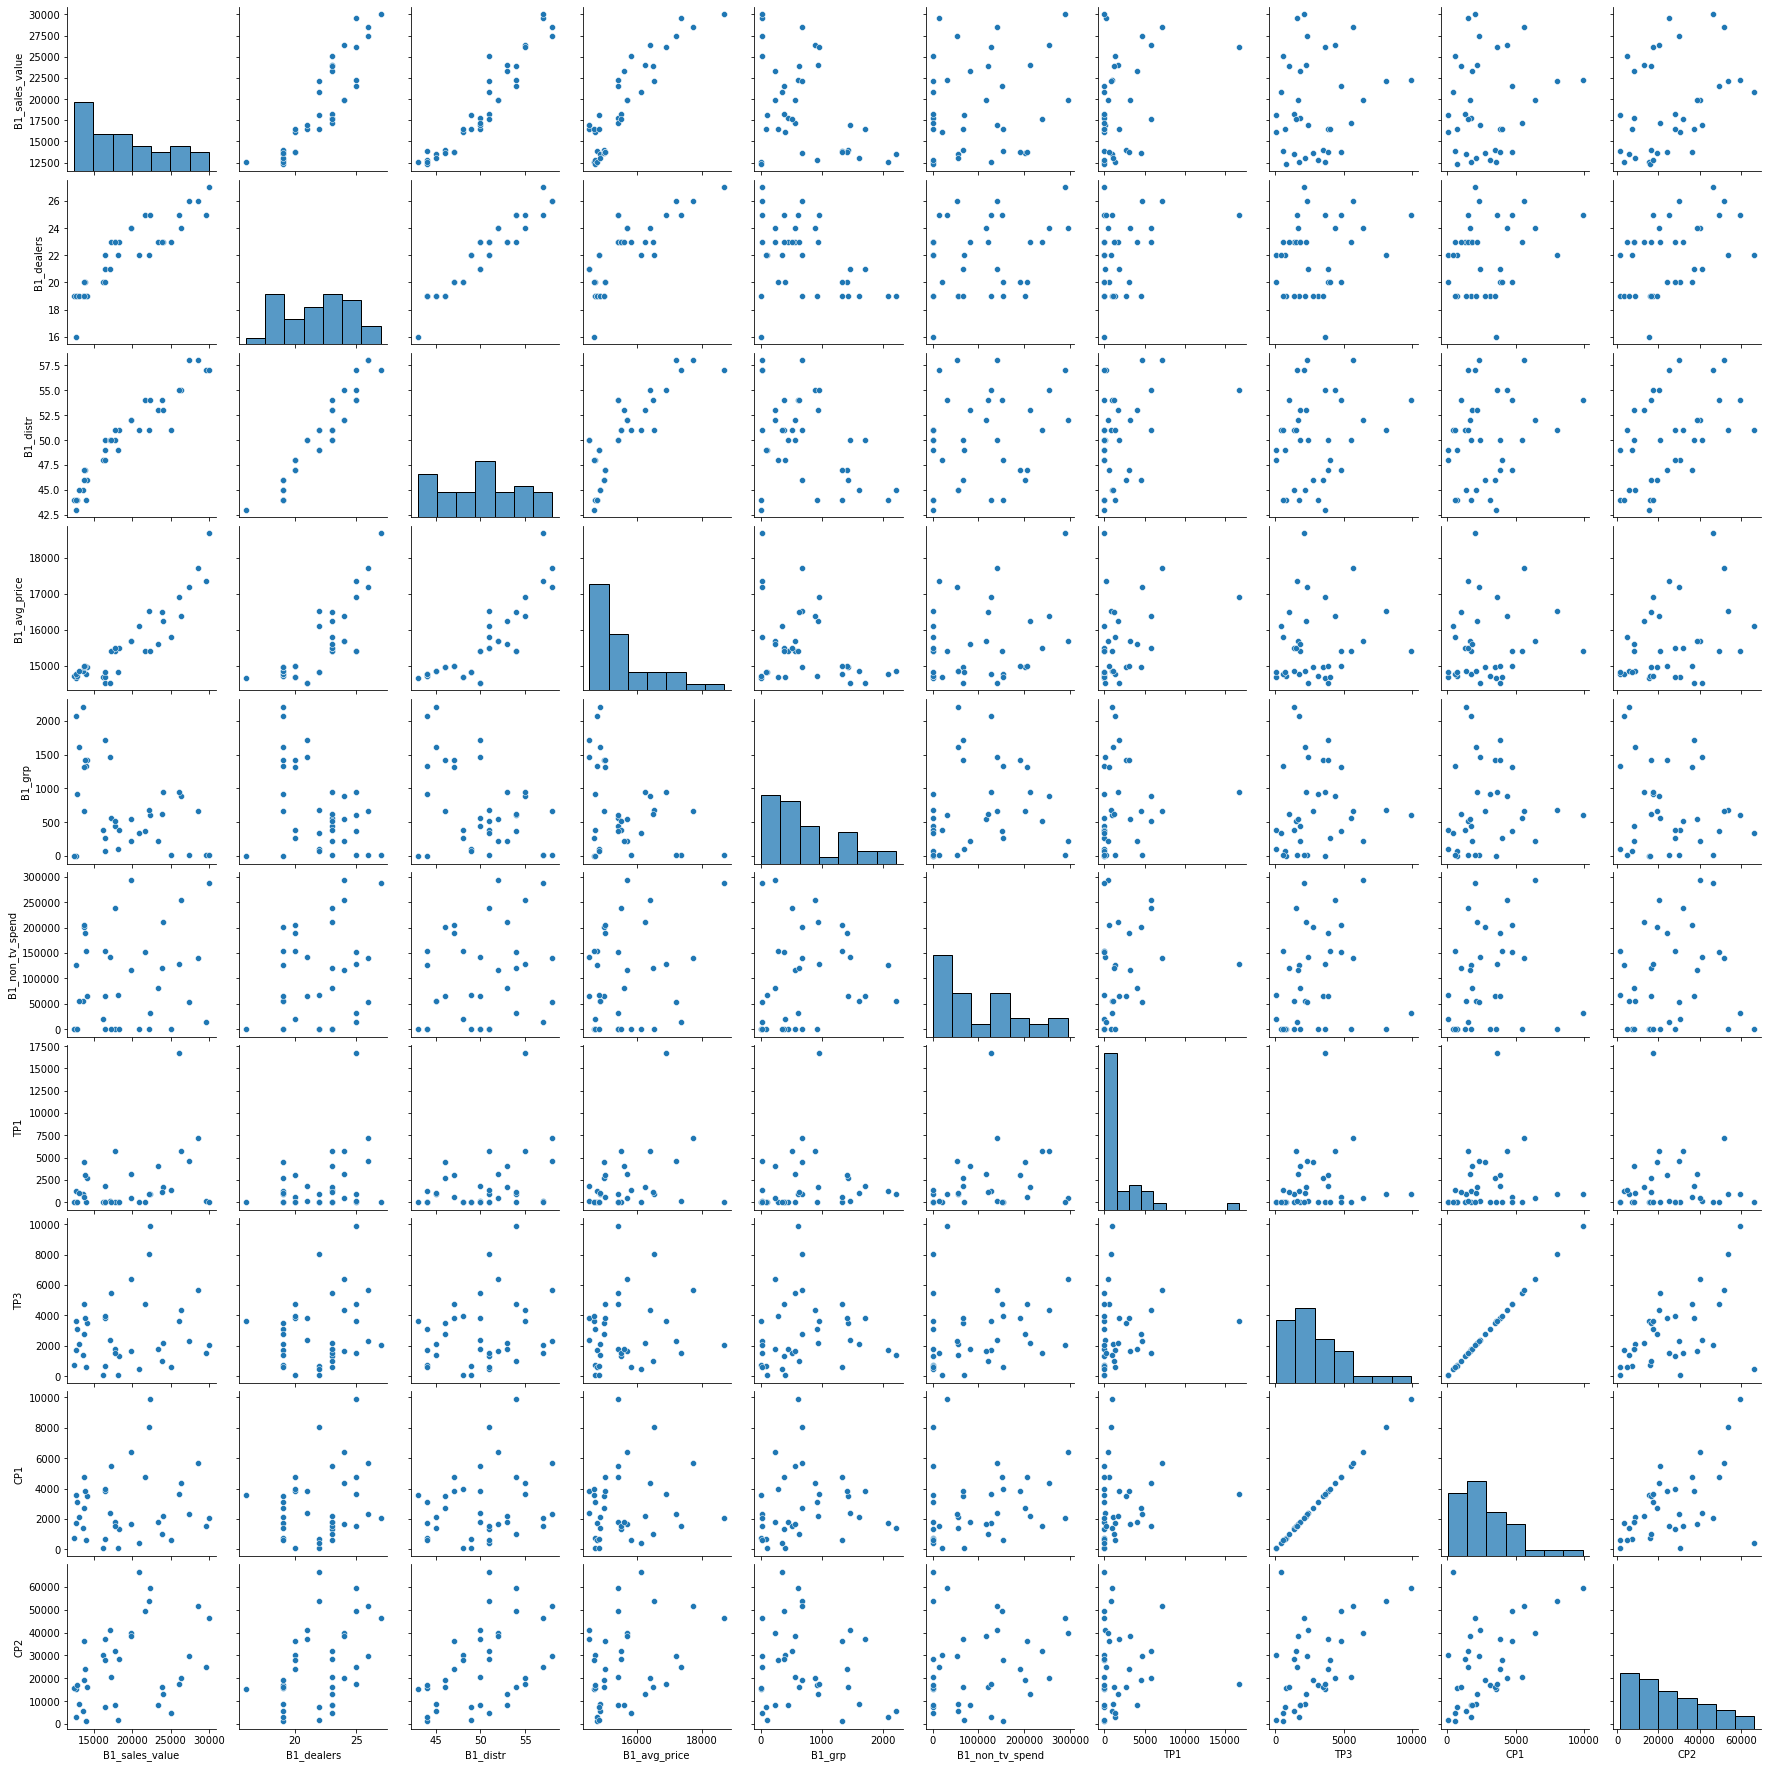

In [144]:
#Visualize
#sns.pairplot(df[rem_columns2].loc[:,"B1_sales_value":"C7_sales_value"])
sns.pairplot(df[rem_columns2].loc[:,["B1_sales_value","B1_dealers","B1_distr","B1_avg_price","B1_grp","B1_non_tv_spend","TP1","TP3","CP1","CP2"]])

In [ ]:
## VIF exceeding 5 or 10 means high multicollinearity in data
## VIF = 1 / (1-R^2)
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
lr = LinearRegression()
print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))

In [134]:
df['B1_grp']

0        NaN
1        NaN
2      923.0
3     1329.0
4     2075.0
5     2211.0
6     1613.0
7     1423.0
8      672.0
9     1415.0
10    1321.0
11    1713.0
12    1467.0
13     386.0
14     273.0
15     105.0
16      75.0
17     444.0
18     559.0
19     384.0
20     513.0
21     229.0
22     551.0
23     371.0
24     607.0
25     676.0
26     345.0
27      15.0
28     224.0
29     941.0
30     626.0
31     885.0
32     948.0
33      19.0
34      17.0
35     671.0
36      11.0
Name: B1_grp, dtype: float64

In [124]:
sum(df['TP1'] == 0)

14

In [103]:
df.shape[0]

37

In [141]:
df[rem_columns2].loc[:,"B1_sales_value":"C7_sales_value"]

,B1_sales_value,cat_sales_value,C1_sales_value,C2_sales_value,C3_sales_value,C4_sales_value,C5_sales_value,C6_sales_value,C7_sales_value
0,12552.42,62845.19,30553.92,3378.92,1631.54,2491.49,3578.44,2394.85,1269.65
1,12363.50,63750.28,31747.62,3788.86,1529.16,1958.63,3962.10,2122.06,1191.30
2,12771.89,65869.93,32804.70,3914.98,1580.14,2023.92,4094.17,2192.80,1231.01
3,13914.19,68350.41,34440.56,3832.02,1443.07,1949.26,3479.77,2366.00,1364.42
4,12564.65,61731.25,31106.38,3461.06,1303.42,1760.62,3143.01,2137.03,1232.38
5,13505.68,67466.28,34952.23,3833.33,1254.22,1628.31,3172.39,2073.61,1202.17
6,13070.01,65290.11,33824.80,3709.67,1213.76,1575.79,3070.15,2006.72,1163.39
7,14035.26,66056.16,33626.25,3459.07,1267.34,2089.62,2936.83,1851.77,1032.35
8,13594.86,63960.11,32557.39,3350.02,1226.48,2022.21,2845.66,1792.04,999.05
9,13734.38,66730.30,34099.19,3524.40,1092.61,2036.73,3351.43,1823.49,941.62
